# Learning Building Thermal Dynamics using Neural State Space Models in NeuroMANCER  


This tutorial demonstrates the use of [Neural State Space Models](https://ieeexplore.ieee.org/abstract/document/9482930) (NSSMs)  for system identificaiton of building thermal dynamics. 
NSSMs are an extension of disctete-time linear [State Space Models](https://en.wikipedia.org/wiki/State-space_representation) (SSM) that have been traditionally used in control engineering for decades. Linear SSMs have the form $x_{k+1} = A x_k + B u_k$.  In NSSMs the linear maps $A$, $B$ are replaced by deep neural networks.


## Building Thermal Dynamics

Energy-efficient buildings are one of the top priorities to sustainably address the global energy demands and reduction of the CO2 emissions [6]. It has been demonstrated that advanced building control, like [model predictive control (MPC)](https://en.wikipedia.org/wiki/Model_predictive_control)
or [deep reinforcement learning (DRL)](https://en.wikipedia.org/wiki/Deep_reinforcement_learning), can notably reduce the energy use and mitigate greenhouse gas emissions. However, in order for these advanced control methods to work in practice, they heavily rely on accurate prediction models of building thermal dynamics.  

**Schematics of Building Systems**:  
A schematics of different components of a modern building is given as follows:
<img src="./figs/building_model.jpg" width="500">  

Today's buildings are composed of components are the [building envelope](https://en.wikipedia.org/wiki/Building_envelope), [HVAC system](https://en.wikipedia.org/wiki/Heating,_ventilation,_and_air_conditioning), sources of disturbances such as [weather](https://en.wikipedia.org/wiki/Weather_forecasting) and [occupancy](https://en.wikipedia.org/wiki/Occupancy), and the peripherals represented by sensors and actuators.

**Modeling paradigms**:  
For modern advanced control methods, it is of paramout importance to have scalable and easy to use methodologies for constructing prediction models of building thermal dynamics. This can be in general obtained in three conceptual methodologies labeled as [white-box](https://en.wikipedia.org/wiki/White_box_(software_engineering)), [gray-box](https://en.wikipedia.org/wiki/Grey_box_model), or [black-box](https://en.wikipedia.org/wiki/Black_box) models.

<img src="./figs/System_identification_methods.png" width="400">  

The white-box models are constructed competely based on known physical laws, while black-box models are obtained purely using function approximators in a data-driven way, while gray-box models are combination of the two.
For more information about the building modeling methods and tools, we refer the reader to the references below. For a broader overiview of the topic of advanced building control we refer to [9].



## System Identification Problem Setup


<img src="../figs/NSSM.PNG" width="500">  


Starting from a given initial condition  $x_{0}$, the next state of the system  $x_{k+1}$
is obtained by feeding the current state $x_{k}$ and current input $u_{k}$  into the NSSM defined by neural nets $A$ and $B$. In system identification, the loss $\mathcal{L}$ is evaluated by comparing the  trajectory generated by the model with the training trajectory. The process can be repeated for multiple trajectories to improve the generalization of the model.


### NSSM References


[1] [D. Masti and A. Bemporad, "Learning Nonlinear State-Space Models Using Deep Autoencoders," 2018 IEEE Conference on Decision and Control (CDC), Miami, FL, USA, 2018](https://ieeexplore.ieee.org/document/8619475)  
[2] [Daniel Gedon, Niklas Wahlström, Thomas B. Schön, Lennart Ljung,
Deep State Space Models for Nonlinear System Identification, IFAC-PapersOnLine, Volume 54, Issue 7, 2021](https://www.sciencedirect.com/science/article/pii/S2405896321011800)  
[3] [E. Skomski, S. Vasisht, C. Wight, A. Tuor, J. Drgoňa and D. Vrabie, "Constrained Block Nonlinear Neural Dynamical Models," 2021 American Control Conference (ACC), New Orleans, LA, USA, 2021](https://ieeexplore.ieee.org/abstract/document/9482930)  
[4] [Jesús M. Zamarreño, Pastora Vega,
State space neural network. Properties and application,
Neural Networks,
Volume 11, Issue 6,
1998](https://www.sciencedirect.com/science/article/pii/S0893608098000744)  
[5] [Christian Legaard, Thomas Schranz, Gerald Schweiger, Ján Drgoňa, Basak Falay, Cláudio Gomes, Alexandros Iosifidis, Mahdi Abkar, and Peter Larsen. 2023. Constructing Neural Network Based Models for Simulating Dynamical Systems. ACM Comput. Surv. 55, 11, Article 236 (November 2023), 34 pages.](https://dl.acm.org/doi/10.1145/3567591)

### Building Thermal Dynamics Models References
[6] [Ján Drgoňa, Aaron R. Tuor, Vikas Chandan, Draguna L. Vrabie,
Physics-constrained deep learning of multi-zone building thermal dynamics,
Energy and Buildings, Volume 243,2021](https://www.sciencedirect.com/science/article/pii/S0378778821002760)  
[7] [Zequn Wang, Yuxiang Chen,
Data-driven modeling of building thermal dynamics: Methodology and state of the art,
Energy and Buildings,
Volume 203,
2019](https://www.sciencedirect.com/science/article/abs/pii/S0378778819303913)  
[8] [Samuel Prívara, Jiří Cigler, Zdeněk Váňa, Frauke Oldewurtel, Carina Sagerschnig, Eva Žáčeková,
Building modeling as a crucial part for building predictive control,
Energy and Buildings,
Volume 56,
2013](https://www.sciencedirect.com/science/article/pii/S0378778812005336)  
[9] [Ján Drgoňa, Javier Arroyo, Iago Cupeiro Figueroa, David Blum, Krzysztof Arendt, Donghun Kim, Enric Perarnau Ollé, Juraj Oravec, Michael Wetter, Draguna L. Vrabie, Lieve Helsen,
All you need to know about model predictive control for buildings,
Annual Reviews in Control,
Volume 50,
2020](https://www.sciencedirect.com/science/article/pii/S1367578820300584)  




## NeuroMANCER and Dependencies

### Install (Colab only)
Skip this step when running locally.

In [ ]:
!pip install neuromancer

*Note: When running on Colab, one might encounter a pip dependency error with Lida 0.0.10. This can be ignored*

In [3]:
import torch
import torch.nn as nn

from neuromancer.psl import plot
from neuromancer import psl
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from matplotlib.lines import Line2D

from neuromancer.system import Node, System
from neuromancer.trainer import Trainer
from neuromancer.problem import Problem
from neuromancer.dataset import DictDataset
from neuromancer.constraint import variable
from neuromancer.loss import PenaltyLoss
from neuromancer.modules import blocks
from neuromancer.plot import pltOL

torch.manual_seed(0);

## Generate trajectories

In this example we don't assume any prior knowledge on the system dynamics of the swing equation. We will only have access to limited measurements of the system states $x$ of an unknown [ordinary differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation) (ODE).

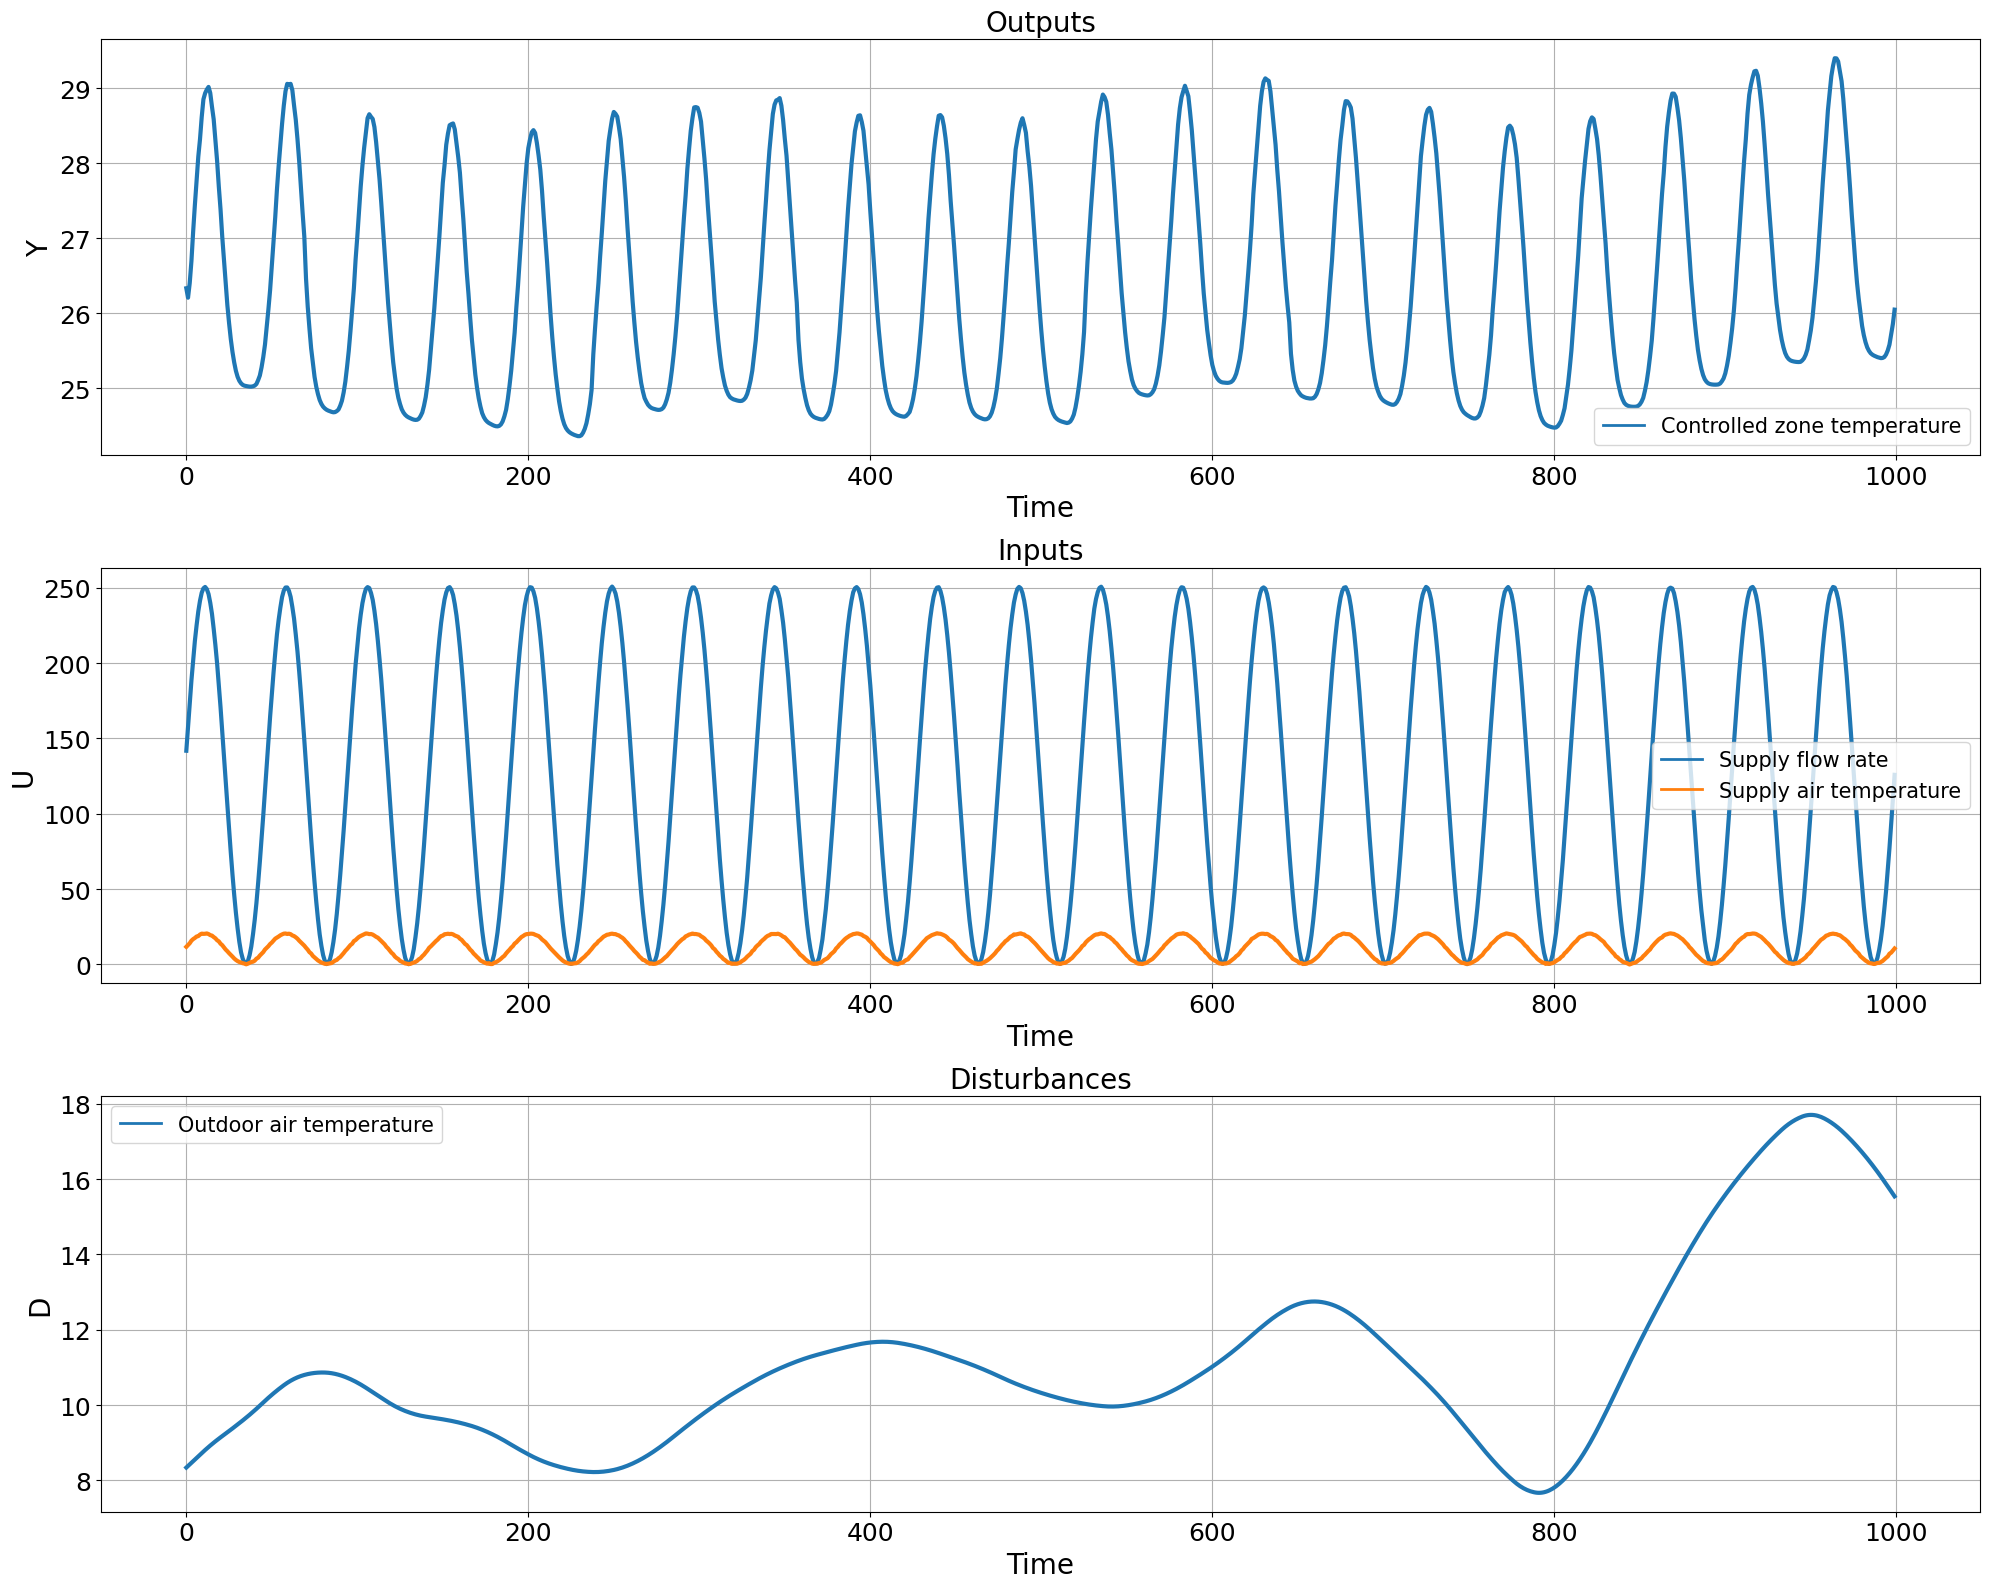

In [5]:
# ground truth system
system_name = "SimpleSingleZone"
system = psl.systems[system_name]
modelSystem = system()
ts = modelSystem.ts
nx = modelSystem.nx
ny = modelSystem.ny
nu = modelSystem.nu
nd = modelSystem.nd
raw = modelSystem.simulate(nsim=1000)
fig, ax = pltOL(Y=raw['Y'], U=raw['U'], D=raw['D'])
# add custom legends to plots
custom_lines_1 = [Line2D([0], [0], color='tab:blue', lw=2, linestyle='-')]
custom_lines_2 = [Line2D([0], [0], color='tab:blue', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:orange', lw=2, linestyle='-')]
ax[0, 0].legend(custom_lines_1, ['Controlled zone temperature'], fontsize=15, loc="best")
ax[1, 0].legend(custom_lines_2, ['Supply flow rate', 'Supply air temperature'], fontsize=15, loc="best")
ax[2, 0].legend(custom_lines_1, ['Outdoor air temperature'], fontsize=15, loc="best")

## Create training data of sampled trajectories

We will obtain a dataset of sampled trajectories of the system dynamics in the form of input-output-disturbance tuples: 
$$D = \big[(u^i_0, d^i_0, {x}^i_0), ..., (u^i_N,  d^i_N, {x}^i_{N}) \big], \, \, i \in [1, ..., m]$$
where $N$ represents the prediction horizon, $m$ represents number of measured trajectories, and $i$ represents an index of the sampled trajectory.
Variables $x_k$ represent system states, $d_k$ are system disturbances, and $u_k$ are exogenous inputs at time $k$.


In [6]:
def normalize(x, mean, std):
    return (x - mean) / std

def get_data(sys, nsim, nsteps, ts, bs):
    """
    :param nsteps: (int) Number of timesteps for each batch of training data
    :param sys: (psl.system)
    :param ts: (float) step size
    :param bs: (int) batch size

    """
    train_sim, dev_sim, test_sim = [sys.simulate(nsim=nsim, ts=ts) for i in range(3)]
    nx = sys.nx
    nu = sys.nu
    nd = sys.nd
    ny = sys.ny
    nbatch = nsim//nsteps
    length = (nsim//nsteps) * nsteps

    mean_x = modelSystem.stats['X']['mean']
    std_x = modelSystem.stats['X']['std']
    mean_y = modelSystem.stats['Y']['mean']
    std_y = modelSystem.stats['Y']['std']
    mean_u = modelSystem.stats['U']['mean']
    std_u = modelSystem.stats['U']['std']
    mean_d = modelSystem.stats['D']['mean']
    std_d = modelSystem.stats['D']['std']

    trainX = normalize(train_sim['X'][:length], mean_x, std_x)
    trainX = trainX.reshape(nbatch, nsteps, nx)
    trainX = torch.tensor(trainX, dtype=torch.float32)
    trainY = normalize(train_sim['Y'][:length], mean_y, std_y)
    trainY = trainY.reshape(nbatch, nsteps, ny)
    trainY = torch.tensor(trainY, dtype=torch.float32)
    trainU = normalize(train_sim['U'][:length], mean_u, std_u)
    trainU = trainU.reshape(nbatch, nsteps, nu)
    trainU = torch.tensor(trainU, dtype=torch.float32)
    trainD = normalize(train_sim['D'][:length], mean_d, std_d)
    trainD = trainD.reshape(nbatch, nsteps, nd)
    trainD = torch.tensor(trainD, dtype=torch.float32)
    train_data = DictDataset({'X': trainX, 'yn': trainY[:, 0:1, :],
                              'Y': trainY,
                              'U': trainU,
                              'D': trainD}, name='train')
    train_loader = DataLoader(train_data, batch_size=bs,
                              collate_fn=train_data.collate_fn, shuffle=True)

    devX = normalize(dev_sim['X'][:length], mean_x, std_x)
    devX = devX.reshape(nbatch, nsteps, nx)
    devX = torch.tensor(devX, dtype=torch.float32)
    devY = normalize(dev_sim['Y'][:length], mean_y, std_y)
    devY = devY.reshape(nbatch, nsteps, ny)
    devY = torch.tensor(devY, dtype=torch.float32)
    devU = normalize(dev_sim['U'][:length], mean_u, std_u)
    devU = devU[:length].reshape(nbatch, nsteps, nu)
    devU = torch.tensor(devU, dtype=torch.float32)
    devD = normalize(dev_sim['D'][:length], mean_d, std_d)
    devD = devD[:length].reshape(nbatch, nsteps, nd)
    devD = torch.tensor(devD, dtype=torch.float32)
    dev_data = DictDataset({'X': devX, 'yn': devY[:, 0:1, :],
                            'Y': devY,
                            'U': devU,
                            'D': devD}, name='dev')
    dev_loader = DataLoader(dev_data, batch_size=bs,
                            collate_fn=dev_data.collate_fn, shuffle=True)

    testX = normalize(test_sim['X'][:length], mean_x, std_x)
    testX = testX.reshape(1, nbatch*nsteps, nx)
    testX = torch.tensor(testX, dtype=torch.float32)
    testY = normalize(test_sim['Y'][:length], mean_y, std_y)
    testY = testY.reshape(1, nbatch*nsteps, ny)
    testY = torch.tensor(testY, dtype=torch.float32)
    testU = normalize(test_sim['U'][:length], mean_u, std_u)
    testU = testU.reshape(1, nbatch * nsteps, nu)
    testU = torch.tensor(testU, dtype=torch.float32)
    testD = normalize(test_sim['D'][:length], mean_d, std_d)
    testD = testD.reshape(1, nbatch*nsteps, nd)
    testD = torch.tensor(testD, dtype=torch.float32)
    test_data = {'X': testX, 'yn': testY[:, 0:1, :],
                 'Y': testY, 'U': testU, 'D': testD,
                 'name': 'test'}

    return train_loader, dev_loader, test_data


In [7]:
nsim = 2000   # number of simulation steps in the dataset
nsteps = 2   # number of prediction horizon steps in the loss function
bs = 100       # minibatching batch size
train_loader, dev_loader, test_data = get_data(modelSystem, nsim, nsteps, ts, bs)

## NSSM system model in Neuromancer

Here we construct a state space model  $x_{k+1} = A_{\theta}(x_k) + B_{\theta}(u_k) +D_{\theta}(d_k)$ with $A$, $B$, $D$ parametrized by neural networks with trainable parameters $\theta$.

In [8]:
class SSM(nn.Module):
    """
    Baseline class for (neural) state space model (SSM)
    Implements discrete-time dynamical system:
        x_k+1 = fx(x_k) + fu(u_k) + fd(d_k)
    with variables:
        x_k - states
        u_k - control inputs
    """
    def __init__(self, fx, fu, fd, nx, nu, nd):
        super().__init__()
        self.fx, self.fu, self.fd = fx, fu, fd
        self.nx, self.nu, self.nd = nx, nu, nd
        self.in_features, self.out_features = nx+nu+nd, nx

    def forward(self, x, u, d):
        """
        :param x: (torch.Tensor, shape=[batchsize, nx])
        :param u: (torch.Tensor, shape=[batchsize, nu])
        :return: (torch.Tensor, shape=[batchsize, outsize])
        """
        # state space model
        x = self.fx(x) + self.fu(u) + self.fd(d)
        return x

In [9]:
n_hidden = 80
n_layers = 2
# instantiate neural nets
fx = blocks.MLP(ny, ny, bias=True,
                 linear_map=torch.nn.Linear,
                 nonlin=torch.nn.ReLU,
                 hsizes=n_layers*[n_hidden])
fu = blocks.MLP(nu, ny, bias=True,
                linear_map=torch.nn.Linear,
                nonlin=torch.nn.ReLU,
                hsizes=n_layers*[n_hidden])
fd = blocks.MLP(nd, ny, bias=True,
                linear_map=torch.nn.Linear,
                nonlin=torch.nn.ReLU,
                hsizes=n_layers*[n_hidden])
# construct NSSM model in Neuromancer
ssm = SSM(fx, fu, fd, ny, nu, nd)

For training we need to obtain accurate reverse-mode gradients by unrolling the operations of the NSSM and using the [backpropagation through time](https://en.wikipedia.org/wiki/Backpropagation_through_time) (BPTT) algorithm. Numner of steps (nsteps) to rollout the NSSM model can be specified in the symbolic System model in Neuromancer.

In [10]:
# construct symbolic model
model = Node(ssm, ['yn', 'U', 'D'], ['yn'], name='NSSM')
dynamics_model = System([model], name='system')

## Define system identification loss function terms

Here we define loss function terms to fit the ODE parameters from given time-series data.

**Tracking loss:**  
$$\ell_x = Q_N||x^i_k - \hat{x}^i_k||_2^2$$ 
**One-step loss:**  
$$\ell_x = Q_1||x^i_1 - \hat{x}^i_1||_2^2$$ 

In [11]:
# %% Constraints + losses:
y = variable("Y")
yhat = variable('yn')[:, :-1, :]

# trajectory tracking loss
reference_loss = 10.*(yhat == y)^2
reference_loss.name = "ref_loss"

# one-step tracking loss
onestep_loss = 1.*(yhat[:, 1, :] == y[:, 1, :])^2
onestep_loss.name = "onestep_loss"

## Construct System ID learning problem

Given the training dataset $D$ we want to solve the following problem:
 
$$
\begin{align}
&\underset{\theta}{\text{minimize}}     && \sum_{i=1}^m \Big(Q_1||x^i_1 - \hat{x}^i_1||_2^2 + \sum_{k=1}^{N}  Q_N||x^i_k - \hat{x}^i_k||_2^2   \Big) \\
&\text{subject to}    &&  x^i_{k+1} = A_{\theta}(x^i_k) + B_{\theta}(u^i_k) +D_{\theta}(d^i_k)
\end{align}
$$  

In [12]:
objectives = [reference_loss, onestep_loss]
constraints = []

# create constrained optimization loss
loss = PenaltyLoss(objectives, constraints)

# construct constrained optimization problem
problem = Problem([dynamics_model], loss)

# plot computational graph
# problem.show()

## Solve the problem

We fit the unknown model parameters $\theta$ using stochastic gradient descent.

In [13]:
optimizer = torch.optim.Adam(problem.parameters(), lr=0.001)
trainer = Trainer(
    problem,
    train_loader,
    dev_loader,
    test_data,
    optimizer,
    patience=100,
    warmup=100,
    epochs=1000,
    eval_metric="dev_loss",
    train_metric="train_loss",
    dev_metric="dev_loss",
    test_metric="dev_loss",
)

In [14]:
# Curriculum Model training
iterations = 5
for i in range(iterations):
    print(f'training {nsteps} objective')
    best_model = trainer.train()
    trainer.model.load_state_dict(best_model)
    nsteps *= 2  # increase prediction horizon
    # create dataloaders with batched trajectories using new prediction horizon
    train_loader, dev_loader, test_data = \
        get_data(modelSystem, nsim, nsteps, ts, bs)
    trainer.train_data, trainer.dev_data, trainer.test_data = \
        train_loader, dev_loader, test_data
    # reset early stopping
    trainer.badcount = 0

training 2 objective
epoch: 0  train_loss: 1.041778802871704
epoch: 1  train_loss: 0.18009290099143982
epoch: 2  train_loss: 0.0791422426700592
epoch: 3  train_loss: 0.04294292628765106
epoch: 4  train_loss: 0.02456294558942318
epoch: 5  train_loss: 0.02030428685247898
epoch: 6  train_loss: 0.016889337450265884
epoch: 7  train_loss: 0.015437133610248566
epoch: 8  train_loss: 0.014356685802340508
epoch: 9  train_loss: 0.01321629248559475
epoch: 10  train_loss: 0.012551501393318176
epoch: 11  train_loss: 0.01200795453041792
epoch: 12  train_loss: 0.011628764681518078
epoch: 13  train_loss: 0.011221081018447876
epoch: 14  train_loss: 0.010868173092603683
epoch: 15  train_loss: 0.010661901906132698
epoch: 16  train_loss: 0.010187954641878605
epoch: 17  train_loss: 0.010137723758816719
epoch: 18  train_loss: 0.010048652067780495
epoch: 19  train_loss: 0.009981023147702217
epoch: 20  train_loss: 0.009596415795385838
epoch: 21  train_loss: 0.009416750632226467
epoch: 22  train_loss: 0.0093459

## Parameter estimation results

In [15]:
test_outputs = dynamics_model(test_data)

In [16]:
def denormalize(x, mean, std):
    return (x * std) + mean

pred_traj = denormalize(test_outputs['yn'][:, :-1, :].detach().numpy(), modelSystem.stats["Y"]["mean"],
                        modelSystem.stats["Y"]["std"]).reshape(-1, ny).T
true_traj = denormalize(test_data['Y'].detach().numpy(), modelSystem.stats["Y"]["mean"],
                        modelSystem.stats["Y"]["std"]).reshape(-1,ny).T
input_traj = denormalize(test_data['U'].detach().numpy(),
                         modelSystem.stats["U"]["mean"], modelSystem.stats["U"]["std"]).reshape(-1, nu).T
dist_traj = denormalize(test_data['D'].detach().numpy(),
                        modelSystem.stats["D"]["mean"], modelSystem.stats["D"]["std"]).reshape(-1,nd).T

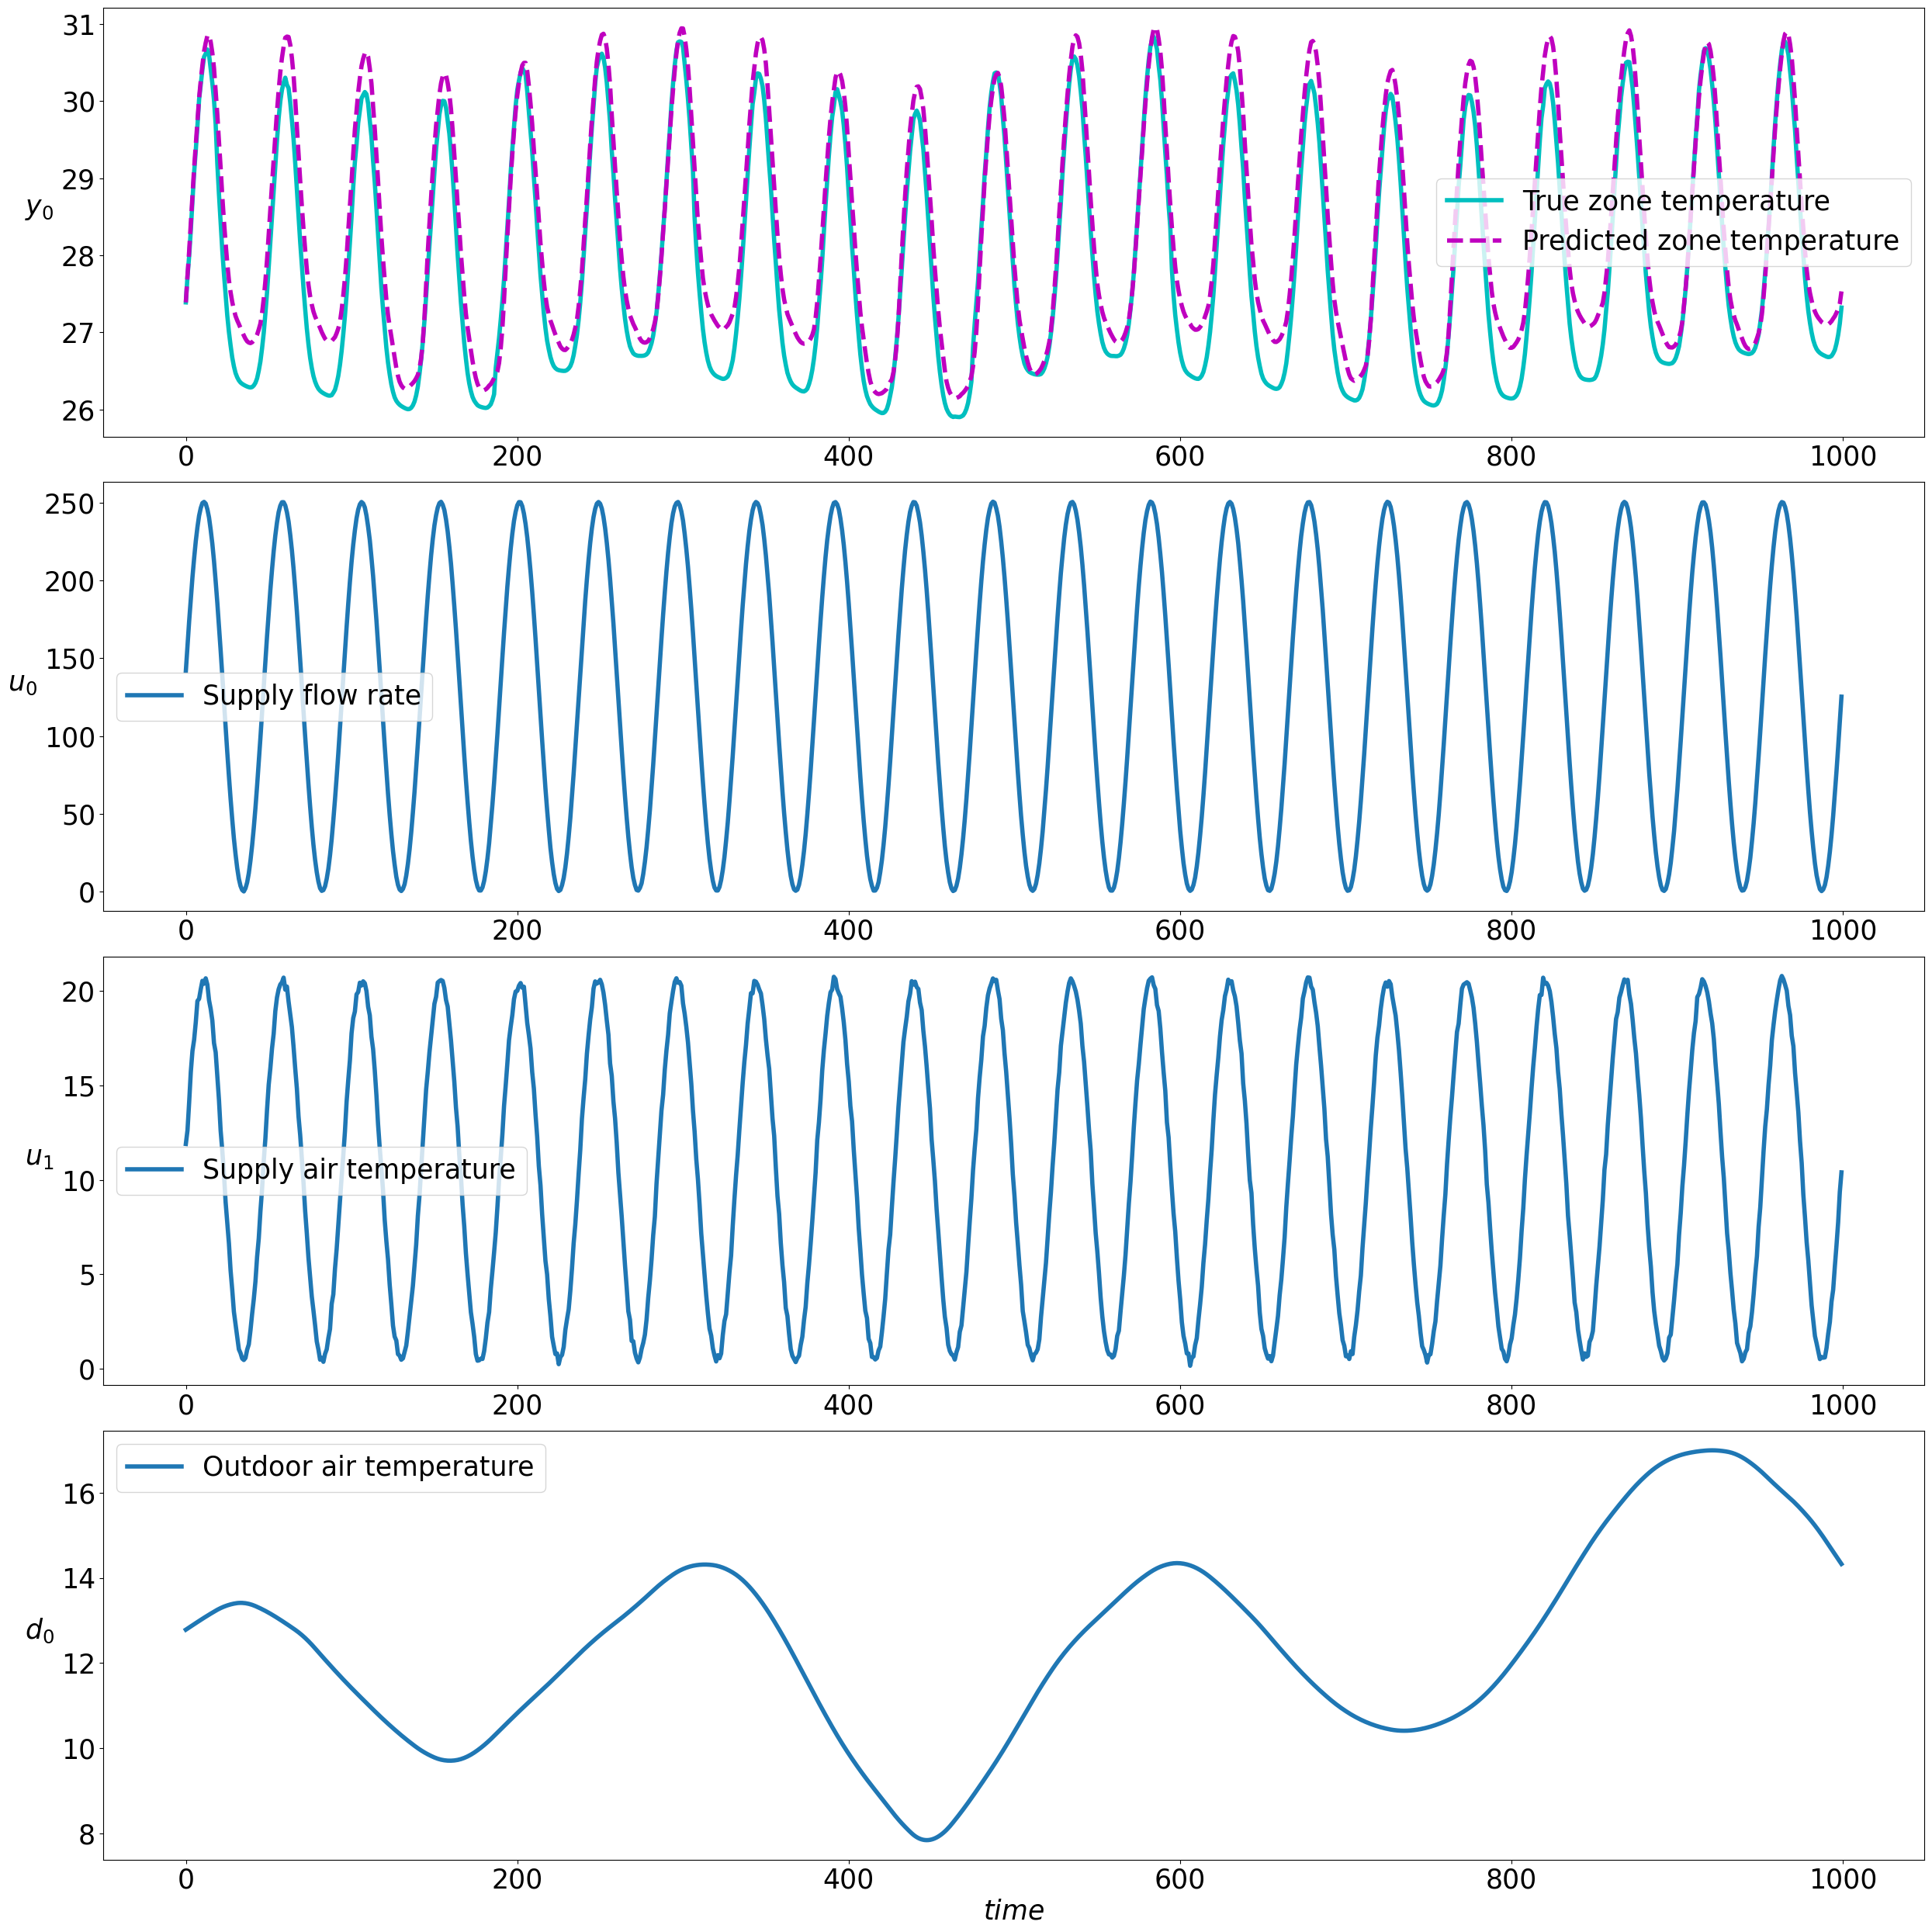

In [18]:
plt_nsteps = 1000

# plot rollout
figsize = 25
fig, ax = plt.subplots(ny + nu + nd, figsize=(figsize, figsize))

x_labels = [f'$y_{k}$' for k in range(len(true_traj))]
for row, (t1, t2, label) in enumerate(zip(true_traj, pred_traj, x_labels)):
    axe = ax[row]
    axe.set_ylabel(label, rotation=0, labelpad=20, fontsize=figsize)
    axe.plot(t1[:plt_nsteps], 'c', linewidth=4.0, label='True zone temperature')
    axe.plot(t2[:plt_nsteps], 'm--', linewidth=4.0, label='Predicted zone temperature')
    axe.tick_params(labelbottom=False, labelsize=figsize)
axe.tick_params(labelbottom=True, labelsize=figsize)
axe.legend(fontsize=figsize)

u_labels = [f'$u_{k}$' for k in range(len(input_traj))]
u_description = ['Supply flow rate', 'Supply air temperature']
for row, (u, label, description) in enumerate(zip(input_traj, u_labels, u_description)):
    axe = ax[row+ny]
    axe.plot(u[:plt_nsteps], linewidth=4.0, label=description)
    axe.legend(fontsize=figsize)
    axe.set_ylabel(label, rotation=0, labelpad=20, fontsize=figsize)
    axe.tick_params(labelbottom=True, labelsize=figsize)

d_labels = [f'$d_{k}$' for k in range(len(dist_traj))]
for row, (d, label) in enumerate(zip(dist_traj, d_labels)):
    axe = ax[row+ny+nu]
    axe.plot(d[:plt_nsteps], linewidth=4.0, label='Outdoor air temperature')
    axe.legend(fontsize=figsize)
    axe.set_ylabel(label, rotation=0, labelpad=20, fontsize=figsize)
    axe.tick_params(labelbottom=True, labelsize=figsize)

ax[-1].set_xlabel('$time$', fontsize=figsize)
plt.tight_layout()
